# Random Forest Classifier for detecting unusual packet lengths

## Import the necessary libraries

In [14]:
# for the processing of the .pcap file to a CSV with the important columns
import pandas as pd 
import random
import matplotlib.pyplot as plt

# those for the Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import socket

# and those for the visuals 
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Get the CSV file data extracted from the pcap file earlier

In [15]:
with open("output_results_tor.csv") as csvfile: 
    df = pd.read_csv(csvfile)
print(df.head())

      Timestamp       Source IP  Destination IP  packet length protocol
0  1.682191e+09  40.114.177.156   192.168.100.5             93      TLS
1  1.682191e+09  40.114.177.156   192.168.100.5             78      TLS
2  1.682191e+09   192.168.100.5  40.114.177.156             54      TCP
3  1.682191e+09   192.168.100.5  40.114.177.156             93      TLS
4  1.682191e+09   192.168.100.5  40.114.177.156             78      TLS


Show how many unique IP addresses were recorded for further processing. 

In [16]:
print(df["Source IP"].unique())
print("Unique Source IPs count: ", len(df["Source IP"].unique()))

['40.114.177.156' '192.168.100.5' '104.16.99.29' '192.229.221.95'
 '192.168.100.1' '142.251.141.45' '20.54.24.148' '172.217.17.99'
 '23.50.184.71' '172.217.169.138' '216.58.212.1' '142.250.184.131'
 '162.125.66.18' '162.125.248.18' '13.107.21.239' '162.159.136.234'
 '35.174.127.31' '18.165.61.89' '18.165.61.28' '10.0.0.0' '100.24.223.135'
 '34.120.208.123' '2.16.19.19' '13.107.140.254' '162.125.66.15'
 '52.108.9.254' '20.189.173.6' '204.79.197.222' '13.107.237.254'
 '93.186.137.157' '150.171.40.254' '13.107.3.254' '162.125.20.1'
 '34.117.65.55' '162.125.66.16' '20.190.160.23' '20.105.73.143'
 '95.100.137.216' '52.156.99.28' '13.69.141.149' '20.112.98.140'
 '137.116.225.129' '52.156.147.113' '2.17.245.133' '20.8.16.139'
 '13.107.237.60' '212.95.165.43' '52.182.141.63' '82.220.38.150'
 '94.230.208.147' '178.254.13.227' '145.239.41.102' '94.242.61.178'
 '162.159.128.233']
Unique Source IPs count:  54


## Setting the categorization and random assignment of categories for Test 1

In [17]:
unique_ips = df["Source IP"].unique()

# Categorization
cat_dict = {
    "legitimate": 1, 
    "backdoor": 4, 
    "malware": 2, 
    "ransomware": 3,
}


def generate_category():
    global cat_dict
    random_key = random.choice(list(cat_dict.keys()))
    random_value = cat_dict[random_key]
    
    return random_value
#     print the result
#     print(f"Random Key/Value Pair: {random_key}/{random_value}")


## Preprocess IP function to make it a list of numerical values

In [18]:
def preprocess_ip(ip):
    try:
        # extract octets from IP address
        octets = ip.split(".")
#         convert octets to integers 
        octets = [int(octet) for octet in octets]
        # return octets as a list
        return octets
    except:
        return None

## Creating the first Classification Test

In [19]:
ips_list = []
list_cats = []

for ip_address in df["Source IP"].unique():
    ip_rand_cat = df.loc[df["Source IP"]==ip_address, ["Source IP", "packet length"]]
    category = generate_category()
    ip_rand_cat["Category"] = category
    
    # get the X and the Y axis as a list 
    ips_list.append(ip_address) # the X 
    list_cats.append(category) # the Y


In [20]:
num_ips_list = []
for ip in ips_list:
    ip = preprocess_ip(ip)
    num_ips_list.append(ip)

# print("List with the categories per unique IP address: ", list_cats)

In [21]:
print("IPs list expressed as numeric values: ", num_ips_list)

IPs list expressed as numeric values:  [[40, 114, 177, 156], [192, 168, 100, 5], [104, 16, 99, 29], [192, 229, 221, 95], [192, 168, 100, 1], [142, 251, 141, 45], [20, 54, 24, 148], [172, 217, 17, 99], [23, 50, 184, 71], [172, 217, 169, 138], [216, 58, 212, 1], [142, 250, 184, 131], [162, 125, 66, 18], [162, 125, 248, 18], [13, 107, 21, 239], [162, 159, 136, 234], [35, 174, 127, 31], [18, 165, 61, 89], [18, 165, 61, 28], [10, 0, 0, 0], [100, 24, 223, 135], [34, 120, 208, 123], [2, 16, 19, 19], [13, 107, 140, 254], [162, 125, 66, 15], [52, 108, 9, 254], [20, 189, 173, 6], [204, 79, 197, 222], [13, 107, 237, 254], [93, 186, 137, 157], [150, 171, 40, 254], [13, 107, 3, 254], [162, 125, 20, 1], [34, 117, 65, 55], [162, 125, 66, 16], [20, 190, 160, 23], [20, 105, 73, 143], [95, 100, 137, 216], [52, 156, 99, 28], [13, 69, 141, 149], [20, 112, 98, 140], [137, 116, 225, 129], [52, 156, 147, 113], [2, 17, 245, 133], [20, 8, 16, 139], [13, 107, 237, 60], [212, 95, 165, 43], [52, 182, 141, 63], [8

Accuracy:  0.22727272727272727


<AxesSubplot:>

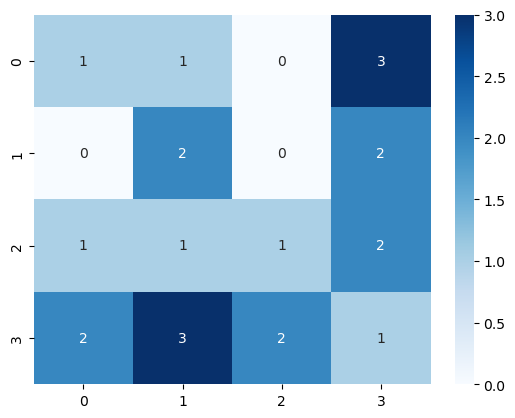

In [23]:
# X = ip_rand_cat["ip_features"].tolist()
# y = ip_rand_cat["Category"].tolist()
   
# Create X and y arrays
X = num_ips_list
y = list_cats


# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create random forrest classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier
rf.fit(X_train, y_train)

# predict on test set
y_pred = rf.predict(X_test)




Calculate the accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Visualise the results using a confusion matrix

In [ ]:
# Calculate confustion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
    

## Splitting the packet lengths into 3 categories based on their Z-score

In [37]:
# Create a database to store each record
whole_database = pd.DataFrame()

count = 1 

# Going through all unique IPs of the CSV file
for ip_address in df["Source IP"].unique():
    
    # Apply preprocess_ip to source IP column to transform them into numerical format
    df['ip_features'] = df['Source IP'].apply(preprocess_ip)
    
    # Create a Category column with an initial value - the randomly generated number between 1 and 4.
    df["Category"] = category
    
    # Show the important columns in a separate dataframe
    df_ip = df.loc[df["Source IP"]==ip_address, ["Source IP", "packet length", "Category", "ip_features"]]
    # print(f"IP number:{count}")
    
    # Get the mean for each IP's packet length
    packet_length_mean = df_ip["packet length"].mean()
    
    # Create a column for the mean
    df_ip["mean"] = "{:.3f}".format(packet_length_mean)

    # Get the standard deviation
    packet_length_std = df_ip["packet length"].std()
    z_score = (df_ip["packet length"] - packet_length_mean)/packet_length_std
    
    # Create a column for the standard deviation of each IP.
    df_ip["std"] = "{:.3f}".format(packet_length_std)
    # packet_length_std_formatted = "{:.2f}".format(packet_length_std)

    # create new column for difference from mean 
    df_ip["pack_len_diff_mean"] = df_ip["packet length"] - packet_length_mean
    
    # for the Standard deviation of each packet, we take the Z-score 
    df_ip["z_score"] = z_score
    # df_ip["z_score"] = (df_ip["packet length"] - packet_length_mean)/packet_length_std

    
    # print(df_ip["z_score"].head())
    
    z_score_data = df_ip["z_score"]
    
    # looping through all the records for this IP to determine the category of the packet depending on its length.
    for z_score in range(len(z_score_data)):
        value = float(z_score_data.iloc[z_score])
        category_val = df_ip["Category"].iat[z_score]
        if value <= -1.5:
            df_ip["Category"].iat[z_score] = 3 # Ransomware 
        elif value >= 1.5:
            df_ip["Category"].iat[z_score] = 2 # Malware
        else: 
            df_ip["Category"].iat[z_score] = 1 # Legitimate traffic
    
#     print(f"Packet length mean: {packet_length_mean}")
#     print(f"Packet length STD: {packet_length_std}")
    
    whole_database = whole_database.append(df_ip)
    count += 1
    


C:\Users\rstef\AppData\Local\Temp\ipykernel_3104\761061316.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_database = whole_database.append(df_ip)
C:\Users\rstef\AppData\Local\Temp\ipykernel_3104\761061316.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_database = whole_database.append(df_ip)
C:\Users\rstef\AppData\Local\Temp\ipykernel_3104\761061316.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_database = whole_database.append(df_ip)
C:\Users\rstef\AppData\Local\Temp\ipykernel_3104\761061316.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_database = whole_database.append(df_ip)
C:\Users\rst

C:\Users\rstef\AppData\Local\Temp\ipykernel_3104\761061316.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_database = whole_database.append(df_ip)
C:\Users\rstef\AppData\Local\Temp\ipykernel_3104\761061316.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_database = whole_database.append(df_ip)
C:\Users\rstef\AppData\Local\Temp\ipykernel_3104\761061316.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_database = whole_database.append(df_ip)
C:\Users\rstef\AppData\Local\Temp\ipykernel_3104\761061316.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_database = whole_database.append(df_ip)
C:\Users\rst

In [41]:
print(type(z_score))

<class 'int'>


In [35]:
print(whole_database.head())

        Source IP  packet length  Category          ip_features    mean  \
0  40.114.177.156             93         2  [40, 114, 177, 156]  64.833   
1  40.114.177.156             78         1  [40, 114, 177, 156]  64.833   
6  40.114.177.156             56         1  [40, 114, 177, 156]  64.833   
7  40.114.177.156             54         1  [40, 114, 177, 156]  64.833   
8  40.114.177.156             54         1  [40, 114, 177, 156]  64.833   

      std  pack_len_diff_mean   z_score  
0  16.714           28.166667  1.685187  
1  16.714           13.166667  0.787750  
6  16.714           -8.833333 -0.528491  
7  16.714          -10.833333 -0.648149  
8  16.714          -10.833333 -0.648149  


## Redo the Random Forest Classification with a different approach

### Create a test DataBase to append the Z-score to the "ip_features" column

In [38]:
test_db = whole_database
# print(f"test_db:\n {test_db.head()}")
print(test_db.head())

        Source IP  packet length  Category          ip_features    mean  \
0  40.114.177.156             93         2  [40, 114, 177, 156]  64.833   
1  40.114.177.156             78         1  [40, 114, 177, 156]  64.833   
6  40.114.177.156             56         1  [40, 114, 177, 156]  64.833   
7  40.114.177.156             54         1  [40, 114, 177, 156]  64.833   
8  40.114.177.156             54         1  [40, 114, 177, 156]  64.833   

      std  pack_len_diff_mean   z_score  
0  16.714           28.166667  1.685187  
1  16.714           13.166667  0.787750  
6  16.714           -8.833333 -0.528491  
7  16.714          -10.833333 -0.648149  
8  16.714          -10.833333 -0.648149  


### Loop over each row in the DataFrame and append the packet length and z-score to the ip_features column


In [39]:
for index, row in test_db.iterrows():
    row["ip_features"].append(row["packet length"])
    row["ip_features"].append(row["std"])
    row["ip_features"].append(row["z_score"])
    
    
    
# or alternatively, use the apply method
# test_db["ip_features"] = test_db.apply(lambda row:row["ip_features"] + [row["z_score"]], axis=1)
    
print(test_db.head())

        Source IP  packet length  Category  \
0  40.114.177.156             93         2   
1  40.114.177.156             78         1   
6  40.114.177.156             56         1   
7  40.114.177.156             54         1   
8  40.114.177.156             54         1   

                                         ip_features    mean     std  \
0  [40, 114, 177, 156, 93, 16.714, 1.685187236939...  64.833  16.714   
1  [40, 114, 177, 156, 78, 16.714, 0.787750246853...  64.833  16.714   
6  [40, 114, 177, 156, 56, 16.714, -0.52849067193...  64.833  16.714   
7  [40, 114, 177, 156, 54, 16.714, -0.64814893728...  64.833  16.714   
8  [40, 114, 177, 156, 54, 16.714, -0.64814893728...  64.833  16.714   

   pack_len_diff_mean   z_score  
0           28.166667  1.685187  
1           13.166667  0.787750  
6           -8.833333 -0.528491  
7          -10.833333 -0.648149  
8          -10.833333 -0.648149  


### Creating the real Random Forest Classifier

#### Preprocessing phase and visualisation of the results via confustion matrix

Accuracy:  1.0


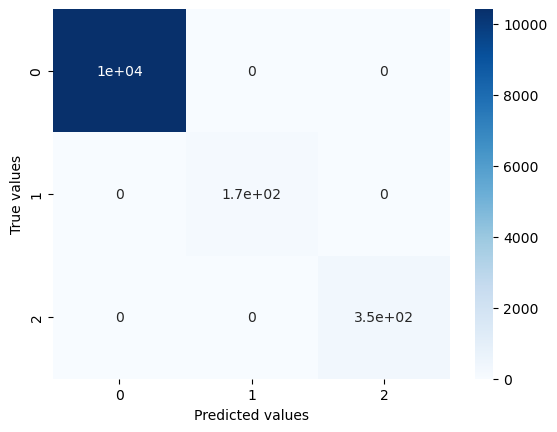

In [41]:
# Drop rows with missing values
test_db.dropna(inplace=True)

# Create X and y arrays
X = test_db["ip_features"].tolist()
y = test_db["Category"].tolist()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create random forrest classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42) 

# Train the classifier
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculate confustion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap="Blues")

# Set x and y labels
plt.xlabel("Predicted values")
plt.ylabel("True values")

# Display the plot
plt.show()
    

Sum of all records

In [54]:
total = len(X_train) + len(X_test)
total

27315

Their distribution for X and y

In [61]:
len(X_train), len(X_test)

print("X_train: ", len(X_train)/total)

print("X_test: ", len(X_test)/total)

X_train:  0.6
X_test:  0.4


In [60]:
len(y_train), len(y_test)

print("y_train: ", len(y_train)/total)

print("y_test: ", len(y_test)/total)

y_train:  0.6
y_test:  0.4


## Get the count of each category and plot it into a bar chart

Legitimate:  25912 
Malware:  438 
Ransomware:  965


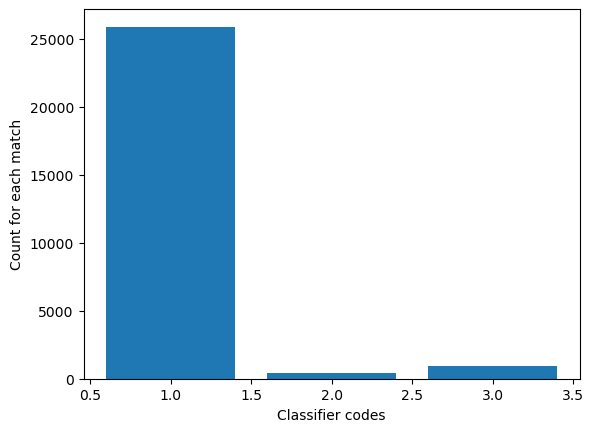

In [14]:
legitimate1 = 0
malware2 = 0
ransomware3 = 0

for cat in range(len(test_db["Category"])):
    value = test_db["Category"].iloc[cat]
    if value == 1:
        legitimate1 += 1
    elif value == 2:
        malware2 += 1
    elif value == 3:
        ransomware3 += 1
        
y = [legitimate1, malware2, ransomware3]
print("Legitimate: ", legitimate1, "\nMalware: ", malware2, "\nRansomware: ", ransomware3)

y_detail = [25905, 438, 965]
x = [1, 2, 3]

plt.bar(x, y)
plt.xlabel("Classifier codes")
plt.ylabel("Count for each match")
plt.show()


### Adding the values of each category in the bar chart

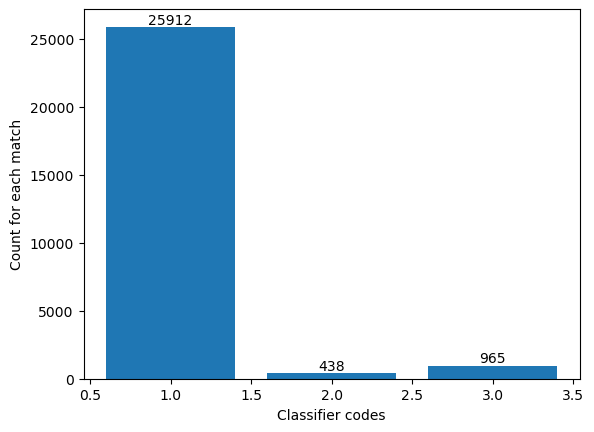

In [15]:
x = [1, 2, 3]
y_detail = [25905, 438, 965]

fig, ax = plt.subplots()
rects = ax.bar(x, y)

# Add labels to the top of each bar
for rect in rects: 
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, height,
           ha="center", va="bottom")
plt.xlabel("Classifier codes")
plt.ylabel("Count for each match")
plt.show()

Visualise the y_test - the actual data and y_pred - the predictions.

Legitimate:  10413 
Malware:  166 
Ransomware:  347


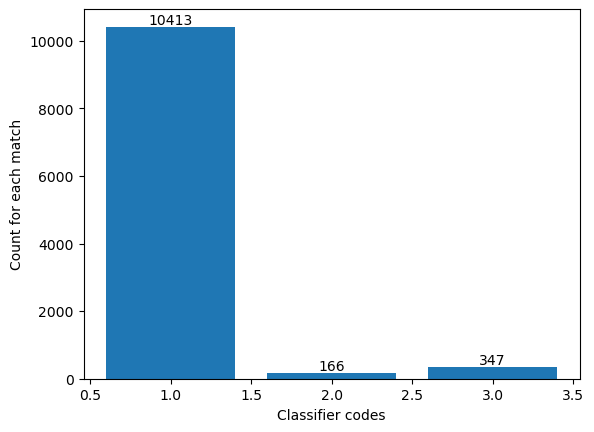

In [67]:
legitimate1 = 0
malware2 = 0
ransomware3 = 0

x = (1, 2, 3)

for cat in range(len(y_test)):
    value = y_pred[cat]
    if value == 1:
        legitimate1 += 1
    elif value == 2:
        malware2 += 1
    elif value == 3:
        ransomware3 += 1
        
y = [legitimate1, malware2, ransomware3]
print("Legitimate: ", legitimate1, "\nMalware: ", malware2, "\nRansomware: ", ransomware3)


fig, ax = plt.subplots()
rects = ax.bar(x, y)

# Add labels to the top of each bar
for rect in rects: 
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, height,
           ha="center", va="bottom")
plt.xlabel("Classifier codes")
plt.ylabel("Count for each match")
plt.show()


Legitimate:  10413 
Malware:  166 
Ransomware:  347


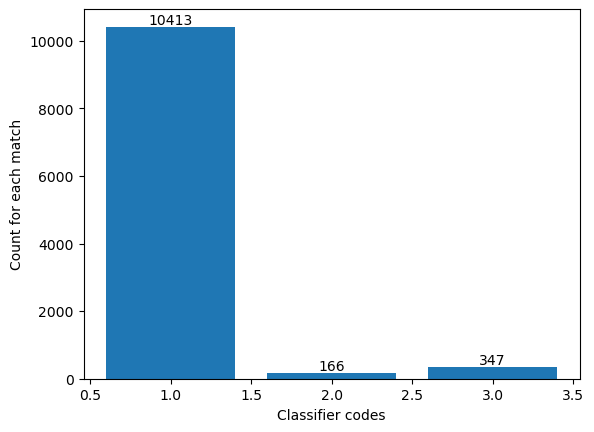

In [68]:
legitimate1 = 0
malware2 = 0
ransomware3 = 0

x = (1, 2, 3)

for cat in range(len(y_pred)):
    value = y_pred[cat]
    if value == 1:
        legitimate1 += 1
    elif value == 2:
        malware2 += 1
    elif value == 3:
        ransomware3 += 1
        
y = [legitimate1, malware2, ransomware3]
print("Legitimate: ", legitimate1, "\nMalware: ", malware2, "\nRansomware: ", ransomware3)


fig, ax = plt.subplots()
rects = ax.bar(x, y)

# Add labels to the top of each bar
for rect in rects: 
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, height,
           ha="center", va="bottom")
plt.xlabel("Classifier codes")
plt.ylabel("Count for each match")
plt.show()